<a target="_blank" href="https://colab.research.google.com/github/Jasonchen0317/CSGY-6613-Assignment/blob/main/assignment-2/assignment_2_nnoptimize.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.preprocessing import scale
import nltk 
from nltk.corpus import stopwords
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras import models 
from tensorflow.keras.datasets import mnist
import optuna

Create BOW(bag of word) dataset

In [2]:
def word_extraction(sentence):    
    ignore = ['a', "the", "is"]   
    words = re.sub("[^\w]", " ",  sentence).split()    
    cleaned_text = [w.lower() for w in words if w not in ignore]    
    return cleaned_text

In [3]:
#tokenize the words
def tokenize(sentences):    
    words = []    
    for sentence in sentences:              
        words.extend(sentence)           
    words = sorted(list(set(words)))    
    return words

In [4]:
#function for bag of words generation
def generate_bow(allsentences, v):     
    print("Word List for Document \n{0} \n".format(v))
    bow = []
    n=0
    for sentence in allsentences:
        n=n+1
        print('sentence: '+str(n))            
        bag_vector = [0] * len(v)        
        for w in sentence:
            if(w==2):
                continue            
            for i,word in enumerate(v):                
                if word == w:                     
                    bag_vector[i] += 1                            
       # print("{0}\n{1}\n".format(sentence,np.array(bag_vector)))
        bow.append(bag_vector)
    return bow

In [74]:
#Load IMDB data, getting top 10000 frequent words and discard top 100 frequent word 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
    path='imdb.npz',
    num_words=10000,
    skip_top=100
)

print(x_train)
print(y_train)

[list([2, 2, 2, 2, 2, 530, 973, 1622, 1385, 2, 458, 4468, 2, 3941, 2, 173, 2, 256, 2, 2, 100, 2, 838, 112, 2, 670, 2, 2, 2, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 2, 2, 172, 4536, 1111, 2, 546, 2, 2, 447, 2, 192, 2, 2, 2, 147, 2025, 2, 2, 2, 2, 1920, 4613, 469, 2, 2, 2, 2, 2, 2, 2, 530, 2, 2, 2, 2, 1247, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 2, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 5244, 2, 480, 2, 3785, 2, 2, 130, 2, 2, 2, 619, 2, 2, 124, 2, 2, 135, 2, 2, 1415, 2, 2, 2, 2, 215, 2, 2, 2, 2, 2, 407, 2, 2, 2, 2, 2, 107, 117, 5952, 2, 256, 2, 2, 2, 3766, 2, 723, 2, 2, 2, 530, 476, 2, 400, 317, 2, 2, 2, 2, 1029, 2, 104, 2, 2, 381, 2, 297, 2, 2, 2071, 2, 2, 141, 2, 194, 7486, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 2, 5535, 2, 2, 2, 2, 224, 2, 2, 104, 2, 226, 2, 2, 2, 1334, 2, 2, 2, 283, 2, 2, 4472, 113, 103, 2, 2, 2, 5345, 2, 178, 2])
 list([2, 194, 1153, 194, 8255, 2, 228, 2, 2, 1463, 4369, 5012, 134, 2, 2, 715, 2, 118, 1634, 2, 394, 2, 2, 119, 954, 189, 102, 2, 207, 110, 3103, 

In [75]:
#Words that are discarded would be changed to 2, so remove all 2s
for x in x_train:
    x[:] = [value for value in x if value != 2]
for x in x_test:
    x[:] = [value for value in x if value != 2]

In [76]:
#get the list of tokens
vocab_train = tokenize(x_train)
vocab_test = tokenize(x_test)
vocab = list(set(vocab_test) | set(vocab_train))
print(len(vocab))

9900


In [77]:
#transform 2000 training data and 500 testing data to bag of words
bow_train = np.array(generate_bow(x_train[:2000], vocab))
bow_test = np.array(generate_bow(x_test[:500], vocab))

Word List for Document 
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 

In [35]:
#create optimizer hyperparameters for trials(Adam)
def create_optimizer_adam(trial):
    # We optimize the choice of optimizers as well as their parameters.
    kwargs = {}
    optimizer_options = ["Adam"]
    optimizer_selected = trial.suggest_categorical("optimizer", optimizer_options)
    if optimizer_selected == "RMSprop":
        kwargs["learning_rate"] = trial.suggest_float(
            "rmsprop_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["weight_decay"] = trial.suggest_float("rmsprop_weight_decay", 0.85, 0.99)
        kwargs["momentum"] = trial.suggest_float("rmsprop_momentum", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "Adam":
        kwargs["learning_rate"] = trial.suggest_float("adam_learning_rate", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "SGD":
        kwargs["learning_rate"] = trial.suggest_float(
            "sgd_opt_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["momentum"] = trial.suggest_float("sgd_opt_momentum", 1e-5, 1e-1, log=True)

    optimizer = getattr(tf.optimizers, optimizer_selected)(**kwargs)
    return optimizer

In [34]:
#create optimizer hyperparameters for trials(sgd)
def create_optimizer_sgd(trial):
    # We optimize the choice of optimizers as well as their parameters.
    kwargs = {}
    optimizer_options = ["SGD"]
    optimizer_selected = trial.suggest_categorical("optimizer", optimizer_options)
    if optimizer_selected == "RMSprop":
        kwargs["learning_rate"] = trial.suggest_float(
            "rmsprop_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["weight_decay"] = trial.suggest_float("rmsprop_weight_decay", 0.85, 0.99)
        kwargs["momentum"] = trial.suggest_float("rmsprop_momentum", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "Adam":
        kwargs["learning_rate"] = trial.suggest_float("adam_learning_rate", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "SGD":
        kwargs["learning_rate"] = trial.suggest_float(
            "sgd_opt_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["momentum"] = trial.suggest_float("sgd_opt_momentum", 1e-5, 1e-1, log=True)

    optimizer = getattr(tf.optimizers, optimizer_selected)(**kwargs)
    return optimizer

In [84]:
#Objective function for logistic regression model(IMDB)
def objective_logistic_adam(trial):
    
    # Build model and optimizer.
    model = Sequential()
    model.add(Dropout(0.5 , input_dim=bow_train.shape[1]))
    model.add(Dense(1,  activation='sigmoid')) 
    
    optimizer = create_optimizer_adam(trial)

    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )
    # Training and validating cycle.
    model.fit(
        bow_train,
        y_train[:2000],
        validation_data=(bow_test, y_test[:500]),
        shuffle=True,
        batch_size=trial.suggest_categorical("batch_size", [16, 32, 64, 128]),
        epochs=20,
        verbose=False,
    )

    # Evaluate the model accuracy on the validation set.
    score = model.evaluate(bow_test, y_test[:500], verbose=0)
    return score[1]



In [ ]:
def objective_logistic_sgd(trial):
    
    # Build model and optimizer.
    model = Sequential()
    model.add(Dropout(0.5 , input_dim=bow_train.shape[1]))
    model.add(Dense(1,  activation='sigmoid')) 
    
    optimizer = create_optimizer_sgd(trial)

    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )
    # Training and validating cycle.
    model.fit(
        bow_train,
        y_train[:2000],
        validation_data=(bow_test, y_test[:500]),
        shuffle=True,
        batch_size=trial.suggest_categorical("batch_size", [16, 32, 64, 128]),
        epochs=20,
        verbose=False,
    )

    # Evaluate the model accuracy on the validation set.
    score = model.evaluate(bow_test, y_test[:500], verbose=0)
    return score[1]



In [ ]:
#Get best hyperparameters of logistic regression model(IMDB) with Adam
study = optuna.create_study(direction="maximize")
study.optimize(objective_logistic_adam, n_trials=100, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
#Get best hyperparameters of logistic regression model(IMDB) with SGD
study = optuna.create_study(direction="maximize")
study.optimize(objective_logistic_sgd, n_trials=100, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

1. Logistic regression (IMDB)

    Adam best trial:

        optimizer: Adam
        adam_learning_rate: 0.0005392099323303767
        batch_size: 16

    SGD best trial:
    
        'optimizer': 'SGD'
        'sgd_opt_learning_rate': 0.020078160490211976
        'sgd_opt_momentum': 2.3768301824490223e-05
        'batch_size': 16

In [ ]:
#Train logistic model with Adam (IMDB dataset)
model1 = Sequential()
model1.add(Dropout(0.5 , input_dim=bow_train.shape[1]))
model1.add(Dense(1,  activation='sigmoid')) 

model1.compile(
        loss="binary_crossentropy",
        optimizer=optimizers.Adam(learning_rate=0.000539),
        metrics=["accuracy"],
    )
adamHistory = model1.fit(
        bow_train,
        y_train[:2000],
        validation_data=(bow_test, y_test[:500]),
        shuffle=True,
        batch_size=16,
        epochs=20,
        verbose=False,
    )


#Train with SGD
model2 = Sequential()
model2.add(Dropout(0.5 , input_dim=bow_train.shape[1]))
model2.add(Dense(1,  activation='sigmoid')) 

model2.compile(
        loss="binary_crossentropy",
        optimizer=optimizers.SGD(learning_rate=0.02007, momentum = 2.3768301824490223e-05),
        metrics=["accuracy"],
    )
sgdHistory = model2.fit(
        bow_train,
        y_train[:2000],
        validation_data=(bow_test, y_test[:500]),
        shuffle=True,
        batch_size=16,
        epochs=20,
        verbose=False,
    )

In [ ]:
#Plot 
aloss = adamHistory.history['loss']
sloss = sgdHistory.history['loss']
epochs = range(len(aloss))

plt.figure()

plt.plot(epochs, aloss, 'bo', label='Adam loss')
plt.plot(epochs, sloss, 'b', label='SGD loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
#Load mnist data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train)
print(y_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]


In [69]:
#Objective function for Logistic regression(mnist)
def objective_logistic_mnist_adam(trial):
    weight_decay = trial.suggest_float("weight_decay", 1e-10, 1e-3, log=True)

    # Build model and optimizer.
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(10, input_dim=28*28, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))) 
    
    optimizer = create_optimizer_adam(trial)
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )
    model.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        shuffle=True,
        batch_size=trial.suggest_categorical("batch_size", [32, 64, 128]),
        epochs=trial.suggest_int("epochs", 20, 50),
        verbose=False,
    )
    score = model.evaluate(x_test, y_test, verbose=0)
    return score[1]

In [2]:
#Objective function for Logistic regression(mnist)
def objective_logistic_mnist_sgd(trial):
    weight_decay = trial.suggest_float("weight_decay", 1e-10, 1e-3, log=True)

    # Build model and optimizer.
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(10, input_dim=28*28, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))) 
    
    optimizer = create_optimizer_sgd(trial)
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )
    model.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        shuffle=True,
        batch_size=trial.suggest_categorical("batch_size", [32, 64, 128]),
        epochs=trial.suggest_int("epochs", 20, 50),
        verbose=False,
    )
    score = model.evaluate(x_test, y_test, verbose=0)
    return score[1]

In [ ]:
#Find best trial for Logistic regression model(mnist)
study = optuna.create_study(direction="maximize")
study.optimize(objective_logistic_mnist_adam, n_trials=20)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
#Find best trial for Logistic regression model(mnist)
study = optuna.create_study(direction="maximize")
study.optimize(objective_logistic_mnist_sgd, n_trials=20)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

2. Logistic regression(mnist)

    Adam best trial:

        weight_decay: 1.7494184617677934e-09
        adam_learning_rate: 0.0019468145629012602
        batch_size: 32


    SGD best trial:

        weight_decay: 3.16940237132108e-08
        sgd_opt_learning_rate: 0.02182054193890978
        sgd_opt_momentum: 0.006850150924679461
        batch_size: 128

In [ ]:
#train  Logistic regression(mnist) model with Adam
weight_decay = 1.7494184617677934e-09
model1=Sequential()
model1.add(Flatten())
model1.add(Dense(10, input_dim=28*28, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))) 

model1.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizers.Adam(learning_rate= 0.0019468145629012602),
        metrics=["accuracy"],
)
adamHistory = model1.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        shuffle=True,
        batch_size=128,
        epochs=50,
        verbose=False,
    )

#Train with SGD
weight_decay = 3.16940237132108e-08
model2=Sequential()
model2.add(Flatten())
model2.add(Dense(10, input_dim=28*28, activation='softmax')) 

model2.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizers.SGD(learning_rate=0.02182054193890978, momentum=0.006850150924679461),
        metrics=["accuracy"],
)
sgdHistory = model2.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        shuffle=True,
        batch_size=128,
        epochs=50,
        verbose=False,
    )


In [ ]:
#Plot loss
aloss = adamHistory.history['loss']
sloss = sgdHistory.history['loss']
epochs = range(len(aloss))

plt.figure()

plt.plot(epochs, aloss, 'bo', label='Adam loss')
plt.plot(epochs, sloss, 'b', label='SGD loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
#Obective function for MLP(mnist) with adam
def objective_multi_adam(trial):
    # Get MNIST data.
    weight_decay = trial.suggest_float("weight_decay", 1e-10, 1e-3, log=True)
    # Build model and optimizer.
    model=Sequential()
    model.add(Flatten())
    model.add(
                tf.keras.layers.Dense(
                    1000,
                    activation="relu",
                    kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                )
            )
    model.add(
                tf.keras.layers.Dense(
                    1000,
                    activation="relu",
                    kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                )
            )
   
    model.add(
            tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(weight_decay))
        )
    
    optimizer = create_optimizer_adam(trial)
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )
    model.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        shuffle=True,
        batch_size=trial.suggest_categorical("batch_size", [32, 64, 128]),
        epochs=20,
        verbose=False,
    )
    score = model.evaluate(x_test, y_test, verbose=0)
    return score[1]

In [54]:
#Find best hyperparameters for MLP(adam)
study = optuna.create_study(direction="maximize")
study.optimize(objective_multi_adam, n_trials=20)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-10-06 23:58:55,296] A new study created in memory with name: no-name-f1b4f7f1-d3fb-45b4-9920-afe79e24ce74
[I 2023-10-07 00:03:59,457] Trial 0 finished with value: 0.10320000350475311 and parameters: {'weight_decay': 1.671593184422339e-06, 'optimizer': 'Adam', 'adam_learning_rate': 0.006873324737075061, 'batch_size': 64}. Best is trial 0 with value: 0.10320000350475311.
[I 2023-10-07 00:13:15,864] Trial 1 finished with value: 0.4212999939918518 and parameters: {'weight_decay': 5.9216528046945155e-08, 'optimizer': 'Adam', 'adam_learning_rate': 1.7672448768271394e-05, 'batch_size': 64}. Best is trial 1 with value: 0.4212999939918518.
[I 2023-10-07 00:20:02,323] Trial 2 finished with value: 0.08969999849796295 and parameters: {'weight_decay': 1.4266411494607521e-08, 'optimizer': 'Adam', 'adam_learning_rate': 8.350221874626718e-05, 'batch_size': 64}. Best is trial 1 with value: 0.4212999939918518.
[I 2023-10-07 00:33:00,062] Trial 3 finished with value: 0.0982000008225441 and parame

In [45]:
#Obective function for MLP(mnist) with sgd
def objective_multi_sgd(trial):

    # Build model and optimizer.
    weight_decay = trial.suggest_float("weight_decay", 1e-10, 1e-3, log=True)
    # Build model and optimizer.
    model=Sequential()
    model.add(Flatten())
    model.add(
                tf.keras.layers.Dense(
                    1000,
                    activation="relu",
                    kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                )
            )
    model.add(
                tf.keras.layers.Dense(
                    1000,
                    activation="relu",
                    kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                )
            )
   
    model.add(
            tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(weight_decay))
        )
    
    optimizer = create_optimizer_sgd(trial)
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )
    model.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        shuffle=True,
        batch_size=trial.suggest_categorical("batch_size", [32, 64, 128]),
        epochs=20,
        verbose=False,
    )
    score = model.evaluate(x_test, y_test, verbose=0)
    return score[1]

In [ ]:
#Find best hyperparameters for MLP(sgd)
study = optuna.create_study(direction="maximize")
study.optimize(objective_multi_sgd, n_trials=20)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

3. MLP(mnist)

    
    Adam best trial:    
        
        weight_decay: 1.902327614830933e-06
        optimizer: Adam
        adam_learning_rate: 1.1116207249364332e-05
        batch_size: 128

    SGD best trial:

        weight_decay: 2.2390287659121835e-05
        optimizer: SGD
        sgd_opt_learning_rate: 1.2071785081135488e-05
        sgd_opt_momentum: 0.002182552235383896
        batch_size: 32

In [ ]:
#Train MLP with Adam
weight_decay = 1.902327614830933e-06
model1=Sequential()
model1.add(Flatten())
model1.add(
            tf.keras.layers.Dense(
                1000,
                activation="relu",
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
            )
        )
 model1.add(
            tf.keras.layers.Dense(
                1000,
                activation="relu",
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
            )
        )
   
model1.add(
        tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(weight_decay))
    )

model1.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizers.Adam(learning_rate=1.1116207249364332e-05),
        metrics=["accuracy"],
)
adamHistory = model1.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        shuffle=True,
        batch_size=128,
        epochs=20,
        verbose=False,
    )



In [50]:
#Train MLP with SGD
weight_decay= 2.2390287659121835e-05
model2=Sequential()
model2.add(Flatten())
model2.add(
            tf.keras.layers.Dense(
                1000,
                activation="relu",
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
            )
        )
model2.add(
            tf.keras.layers.Dense(
                1000,
                activation="relu",
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
            )
        )
   
model2.add(
        tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(weight_decay))
    )

model2.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizers.SGD(learning_rate=1.2071785081135488e-05, momentum=0.002182552235383896),
        metrics=["accuracy"],
)
sgdHistory = model2.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        shuffle=True,
        batch_size=32,
        epochs=20,
        verbose=False,
    )

In [ ]:
aloss = adamHistory.history['loss']
sloss = sgdHistory.history['loss']
epochs = range(len(aloss))

plt.figure()

plt.plot(epochs, aloss, 'r', label='Adam loss')
plt.plot(epochs, sloss, 'b', label='SGD loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
#Load cifar10 data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [10]:
#create cnn models for trial
def create_cnn_model(trial):
    model = models.Sequential()
    model.add(layers.Conv2D(
                filters=trial.suggest_categorical("filters1", [32, 64]),
                kernel_size=(5,5),
                activation='relu',
                input_shape=(32, 32, 3)
                )
            )
    model.add(layers.MaxPooling2D((3, 3), padding='same', strides=2))
    model.add(layers.Conv2D(
                filters=trial.suggest_categorical("filters2", [64, 128]),
                kernel_size=(5,5),
                activation='relu'
                )
            )
    model.add(layers.MaxPooling2D((3, 3), padding='same', strides=2))
    model.add(layers.Conv2D(
                filters=trial.suggest_categorical("filters3", [64, 128]),
                kernel_size=(5,5),
                activation='relu'
                )
            )
    
    model.add(layers.MaxPooling2D((3, 3), padding='same', strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1000, activation='relu'))
    
    model.add(layers.Dense(10, activation='softmax'))
    
    
    return model

In [13]:
#Obective function for cnn
def objective_cnn_adam(trial):
    # Get MNIST data.

    # Build model and optimizer.
    model = create_cnn_model(trial)
    
    optimizer = create_optimizer_adam(trial)
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )
    model.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        shuffle=True,
        batch_size=trial.suggest_categorical("batch_size", [32, 64, 128]),
        epochs=3,
        verbose=False,
    )
    score = model.evaluate(x_test, y_test, verbose=0)
    return score[1]

In [ ]:
#Obective function for cnn
def objective_cnn_sgd(trial):
    # Get MNIST data.

    # Build model and optimizer.
    model = create_cnn_model(trial)
    
    optimizer = create_optimizer_sgd(trial)
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )
    model.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        shuffle=True,
        batch_size=trial.suggest_categorical("batch_size", [32, 64, 128]),
        epochs=3,
        verbose=False,
    )
    score = model.evaluate(x_test, y_test, verbose=0)
    return score[1]

In [ ]:
#Find the best hyperparameters for cnn
study = optuna.create_study(direction="maximize")
study.optimize(objective_cnn_adam, n_trials=20)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
#Find the best hyperparameters for cnn
study = optuna.create_study(direction="maximize")
study.optimize(objective_cnn_sgd, n_trials=20)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

4. CIFAR10 ConvNet

    Adam best trial:

        filters1: 64
        filters2: 128
        filters3: 128
        adam_learning_rate: 0.0003257776589041341
        batch_size: 32

    SGD best trial:

        filters1: 32
        filters2: 128
        filters3: 128
        optimizer: SGD
        sgd_opt_learning_rate: 0.0021377955881893506
        sgd_opt_momentum: 7.00563871549871e-05
        batch_size: 32


In [18]:
#Build and train the tuned CNN model with Adam optimizer
model = models.Sequential()
model.add(layers.Conv2D(
                filters=64,
                kernel_size=(5,5),
                activation='relu',
                input_shape=(32, 32, 3)
                )
            )
model.add(layers.MaxPooling2D((3, 3), padding='same', strides=2))
model.add(layers.Conv2D(
                filters=128,
                kernel_size=(5,5),
                activation='relu'
                )
            )
model.add(layers.MaxPooling2D((3, 3), padding='same', strides=2))
model.add(layers.Conv2D(
                filters=128,
                kernel_size=(5,5),
                activation='relu'
                )
            )
    
model.add(layers.MaxPooling2D((3, 3), padding='same', strides=2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1000, activation='relu'))
    
model.add(layers.Dense(10, activation='softmax'))

model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizers.Adam(learning_rate=0.0003257776589041341),
        metrics=["accuracy"],
    )

adamHistory = model.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        shuffle=True,
        batch_size=32,
        epochs=45,
        verbose=False,
    )




In [20]:
#Build and train the tuned CNN model with SGD optimizer
model = models.Sequential()
model.add(layers.Conv2D(
                filters=32,
                kernel_size=(5,5),
                activation='relu',
                input_shape=(32, 32, 3)
                )
            )
model.add(layers.MaxPooling2D((3, 3), padding='same', strides=2))
model.add(layers.Conv2D(
                filters=128,
                kernel_size=(5,5),
                activation='relu'
                )
            )
model.add(layers.MaxPooling2D((3, 3), padding='same', strides=2))
model.add(layers.Conv2D(
                filters=128,
                kernel_size=(5,5),
                activation='relu'
                )
            )
    
model.add(layers.MaxPooling2D((3, 3), padding='same', strides=2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1000, activation='relu'))
    
model.add(layers.Dense(10, activation='softmax'))

model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizers.SGD(learning_rate=0.0021377955881893506, momentum=7.00563871549871e-05),
        metrics=["accuracy"],
    )

sgdHistory = model.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        shuffle=True,
        batch_size=32,
        epochs=45,
        verbose=False,
    )

In [ ]:
aloss = adamHistory.history['loss']
sloss = sgdHistory.history['loss']
epochs = range(len(aloss))

plt.figure()

plt.plot(epochs, aloss, 'r', label='Adam loss')
plt.plot(epochs, sloss, 'b', label='SGD loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The results of the paper aren't exactly replicated. In this assignment, we are asked to utilize optuna to optimize the hyperparameters for each model. In the paper "Adam: A Method for Stochastic Optimization", the models was predefined without tuning. 

Without any hyperparameters tuning involved, Adam optimizer performed much better than SGD optimizer in training logistic regression and MLP models with IMDB dataset. After tuning the hyperparameters, although adam still perform better, the performance between SGD optimizer and Adam optimizer isn't significant. The paper "Optimization for deep learning: theory and algorithms" states that Adam optimizer is  relative insensitivity to hyperparameters compared to SGD, thus Adam optimizer is able to perform better in the model provided by the paper.

IMDB BoW feature Logistic Regression

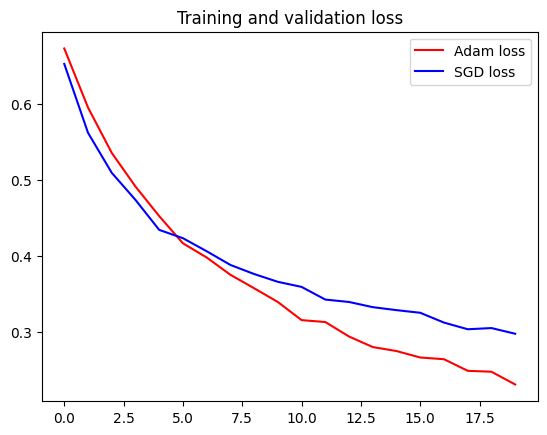

MNIST Logistic Regression accuracy

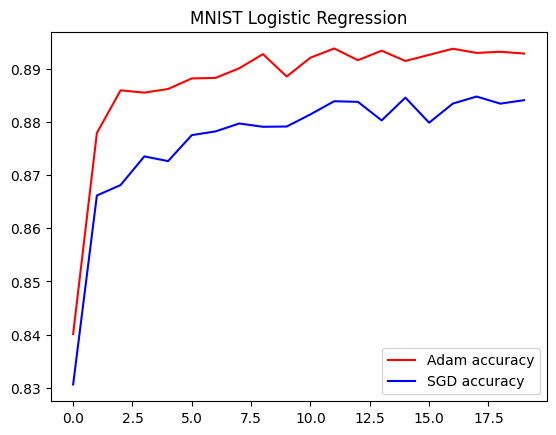

MNIST Multilayer Neural Network

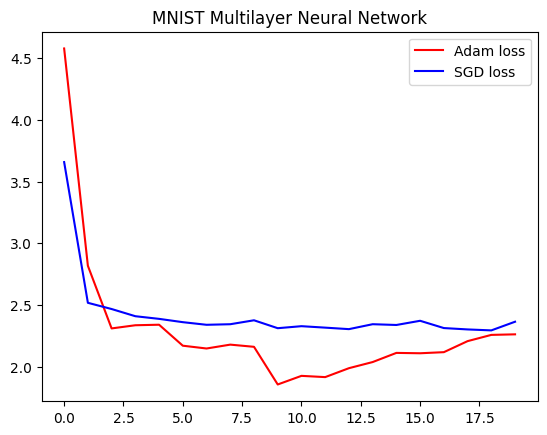

CIFAR10 ConvNet

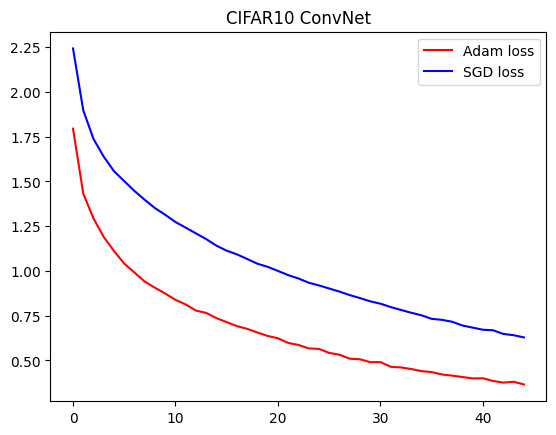